In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from random import *    
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
#Mutual information
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

df = pd.read_csv("kasMasterNew.csv",sep=';')
#print("data shape: ", df.shape)
#print("data head: ", df.head)

first_column = df.columns[0]
df = df.drop([first_column], axis=1)
feature_labels = df.columns
last = df.iloc[:,-1]
df = df.iloc[:, :-1]

X = df
y = np.ravel(last.to_numpy()
            )
#print("y: ", y)
#print("data X: ", X)
#print("features: ",feature_labels[:-1])

#X_t = df.to_numpy()
#yy = np.ravel(last.to_numpy())

X1, X_testEnd, y1, y_testEnd = train_test_split(X, y, test_size = 0.1)


#run mutual information til 60 % reduction
#sel = SelectPercentile(mutual_info_classif, percentile=20).fit(X1, y1)
#model = list()    
#X_t = sel.transform(X1)
X_t = X1.to_numpy()
from sklearn.svm import NuSVC
model = list()
features = list()

for x in range(1,2):
    folds = 6
    skf = StratifiedKFold(n_splits=folds, random_state=randint(1, 20000), shuffle=True, )
    skf.get_n_splits(X_t, y1)
    acc_score = []
    for train_index, test_index in skf.split(X_t, y1):
        X_train, X_test = X_t[train_index], X_t[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)
        
        X_train1 = scaler.transform(X_train)
        X_test1 = scaler.transform(X_test)
        
        estimator = GradientBoostingClassifier(min_child_weight= 1, max_depth= 5, learning_rate= 0.2, colsample_bytree = 0.7, n_estimators=800, verbosity = 0)
        #estimator = SVC(kernel="linear", decision_function_shape='ovo', cache_size=200, class_weight={'Basal':1, 'Her2':1, 'LumA':1, 'LumB':1.3, 'Normal':1}, random_state=randint(1, 10000))
        selector = RFE(estimator, n_features_to_select=47, step=100)
        selector = selector.fit(X_train1, y_train)

        print("Support: ", selector.support_)
        print("Ranking", selector.ranking_)

        #from imblearn.over_sampling import SMOTE
        #oversample = SMOTE()
        X_test2, y_test2 = X_test1, y_test
        #X_test2, y_test2 = oversample.fit_resample(X_test1, y_test)

        X_train11 = pd.DataFrame(X_train1)
        X_test11 = pd.DataFrame(X_test2)

        f = selector.get_support(1)

        X_train = X_train11[X_train11.columns[f]]
        X_test = X_test11[X_test11.columns[f]]

        clf = xgboost.XGBClassifier(min_child_weight= 1, max_depth= 5, learning_rate= 0.2, colsample_bytree = 0.7, n_estimators=800, verbosity = 0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        #print('Accuracy on test set: ')
        print(accuracy_score(y_test2, y_pred))
        print(confusion_matrix(y_test2,y_pred))
        print(classification_report(y_test2,y_pred))
        acc_score.append(accuracy_score(y_test2, y_pred))
        
        features.append(df[df.columns[f]])
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             
print("Model:", model)

/Users/martin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/martin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/martin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sk

KeyboardInterrupt: 

71
784
1258
1674
1858
1945
2447
2841
2855
3701
3712
3737
3845
3944
Top doules features names:  ('TTK',)
Top doules weights:  (0.0,)


<ipython-input-17-3a318867f3b4>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_xticklabels(labels= np.unique(dd).tolist(), rotation=90, fontsize=4)


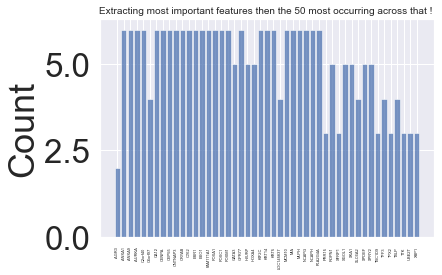

In [17]:
uniquelist = list()
allfeatures = list()
merged = list()
for i in features:
    allfeatures.append(i.columns)
for subset in allfeatures:
    for word in subset:
        merged.append(word)
    
unique = []
double = []
triple = []
final = []
for number in merged:   
    if number in unique:
        if number in double:
            final.append(number)
        else:
            double.append(number)       
    else:
        unique.append(number)
        
from numpy.core.fromnumeric import sort

#print(unique)
#print(final)
finish = final + double + double
#print(sort(finish))

morethan22 = []
morethan2 = 0
twoOrLess = 0
twoOrLesss = []
for number2 in np.unique(finish).tolist():   
    if (number2 in np.unique(final).tolist()):
        morethan22.append(number2)
        morethan2 = morethan2 + 1
    else:
        twoOrLess = twoOrLess + 1
        twoOrLesss.append(number2)


l = list()
indexNames = list()
newImp = list()

def f_importances(coef, names, top):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    for ind, colum in enumerate(df.columns):
        for name in twoOrLesss:  
            if colum == name:
                print(ind)
                #index = names.index(name)
                newImp.append(imp[ind])
                
    imp2, names2 = zip(*sorted(list(zip(newImp, twoOrLesss))))
    print("Top doules features names: ", names2[::-1][0:top])
    print("Top doules weights: ", imp2[::-1][0:top])
    l.append(names2[::-1][0:top])

clfAll = xgboost.XGBClassifier(min_child_weight= 1, max_depth= 5, learning_rate= 0.2, colsample_bytree = 0.7, n_estimators=800, verbosity = 0)
clfAll.fit(X, y)

absCoef = abs(clfAll.feature_importances_)
absAverageCoef = absCoef.mean(axis=0)
f_importances(absCoef, feature_labels, top=(47 - morethan2))

allFinalF = list()
more = list()

for jj in l[0]:
    allFinalF.append(jj)
    allFinalF.append(jj)

for ee in finish:
    if ee in final:
        more.append(ee) 

dd = allFinalF + more       

import seaborn as sns
sns_plot = sns.histplot(data=dd, shrink=.8)
sns_plot.set_xticklabels(labels= np.unique(dd).tolist(), rotation=90, fontsize=4)
sns_plot.set_title('Extracting most important features then the 50 most occurring across that ! ', fontsize=10)
sns_plot.figure.savefig('features5-333366.png', bbox_inches='tight', dpi=500)

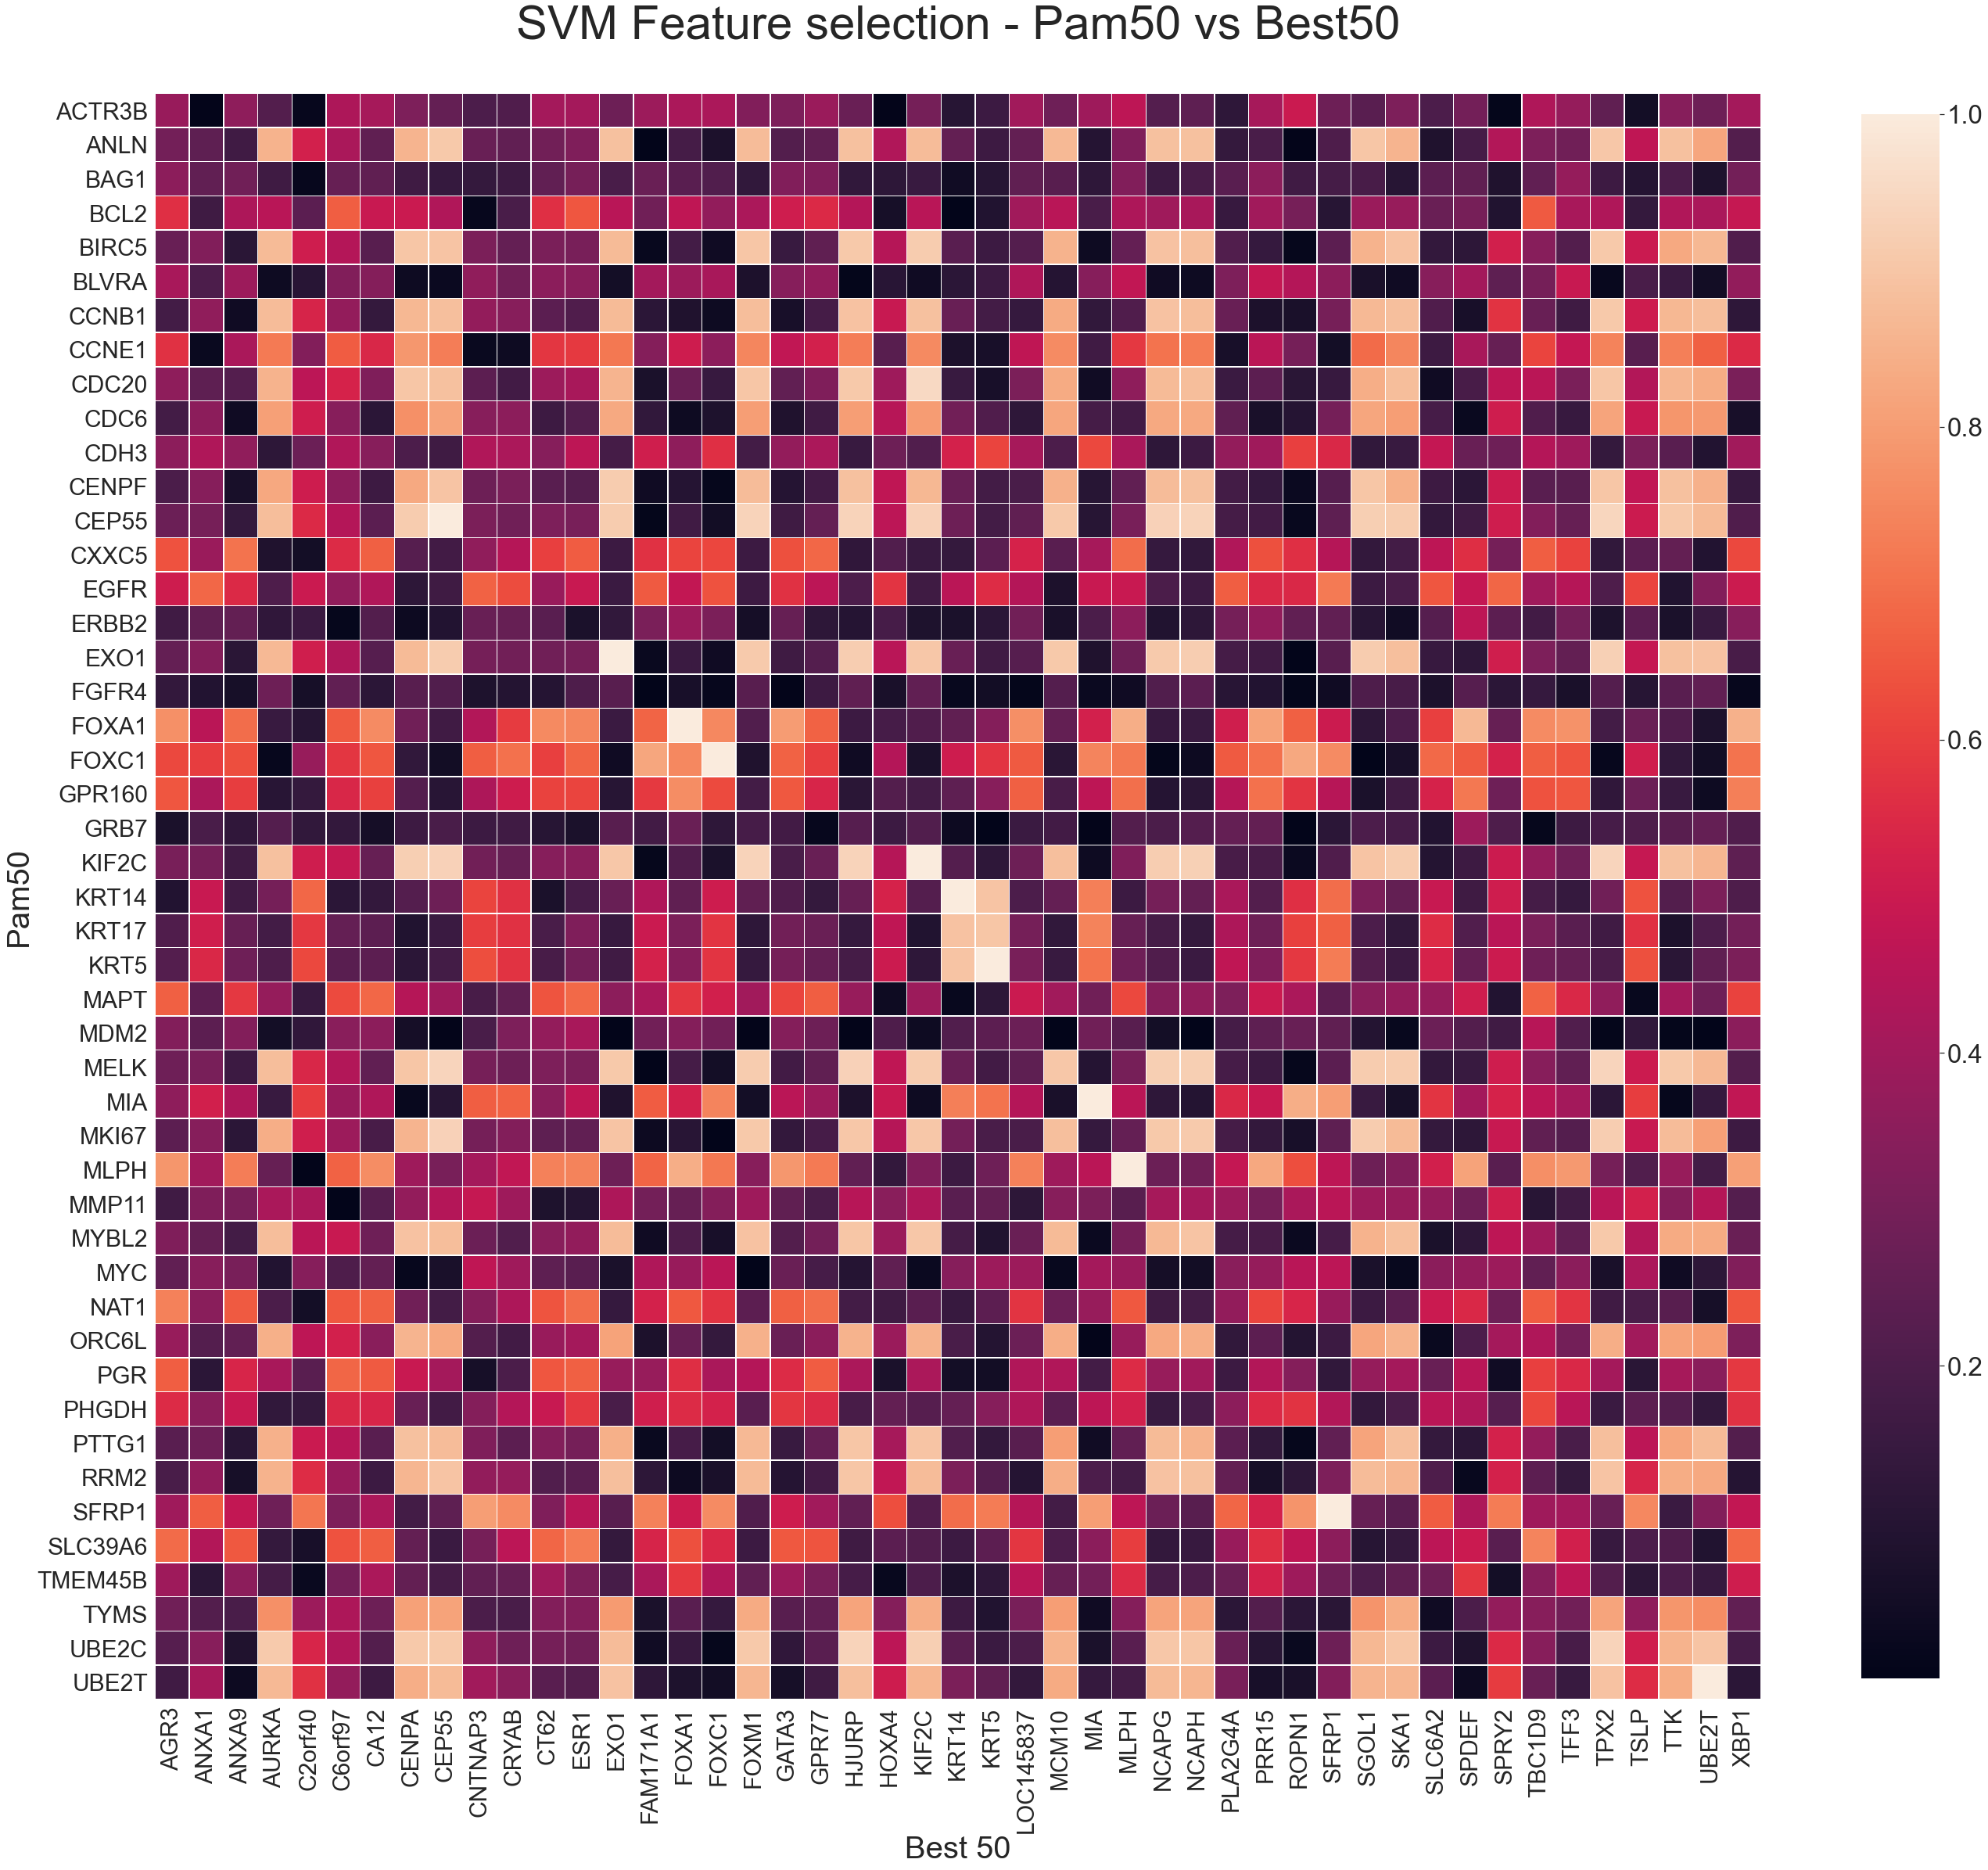

<Figure size 432x288 with 0 Axes>

In [18]:
pam50 = ['ACTR3B','ANLN','BAG1','BCL2','BIRC5','BLVRA','CCNB1','CCNE1','CDC20','CDC6',
'CDH3','CENPF','CEP55','CXXC5','EGFR','ERBB2','EXO1','FGFR4','FOXA1',
'FOXC1','GPR160','GRB7','KIF2C','KRT14','KRT17','KRT5','MAPT','MDM2','MELK',
'MIA','MKI67','MLPH','MMP11','MYBL2','MYC','NAT1','ORC6L','PGR','PHGDH','PTTG1','RRM2',
'SFRP1','SLC39A6','TMEM45B','TYMS','UBE2C','UBE2T']

# not in out data set : ['SR1', 'KNTC2', 'CDCA1'] so deleted from pam 50.

best50 = df[np.unique(dd).tolist()] # of latest best features
p = df[pam50]

from numpy.random import seed
from scipy.stats import pearsonr

# seed random number generator
seed(1)
# prepare data
#best50 = best50.iloc[:, 0:2]
#p = p.iloc[:, 0:2]
ll = list()
# calculate Pearson's correlation
col = list()
for ind, colum in enumerate(best50.columns):
    #corr, _ = pearsonr(p.columns[ind], column)
    #l.appende(corr)
    for ins, column in enumerate(p.columns):
        #print(colum)
        #print(column)
        #print(p.columns[ind])
        #print(ind)
        #print(best50.columns[ins])
        #print(ins)
        corr, _ = pearsonr(p[column], best50[colum])
        #print(abs(corr))
        col.append(abs(corr))
    ll.append(col)
    col=[] 
#print(l)  

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

fig, ax = plt.subplots(figsize=(46, 46))
#plt.xlabel(best50.columns)
#plt.ylabel(p.columns)

#fig.title('Pearson Absolute Values', fontsize=40)

x_axis_labels = best50.columns.to_numpy() # labels for x-axis
y_axis_labels =  p.columns.to_numpy()# labels for y-axis

# create seabvorn heatmap with required labels
b = sb.heatmap(np.array(ll).T.tolist(),  xticklabels=x_axis_labels, yticklabels=y_axis_labels,
           linewidth=0.4, cbar_kws={"shrink": .8}, fmt=".2f",square=True)
b.axes.set_title("SVM Feature selection - Pam50 vs Best50\n ",fontsize=60)
b.set_xlabel("Best 50",fontsize=40)
b.set_ylabel("Pam50",fontsize=40)
b.tick_params(labelsize=30)
sb.set(font_scale=3)
plt.show()
plt.savefig('HeatMap-Pam50vsFeatureSelectionBest50-166.jpg',dpi=400)

[[ 36   1   0   0   0]
 [  0  11   2   2   0]
 [  0   0 105   2   0]
 [  0   0   3  37   0]
 [  1   0   1   0  28]]
[[ 35   1   0   0   0]
 [  0  13   1   2   0]
 [  0   0 101   5   0]
 [  0   0   6  35   0]
 [  1   2   4   0  23]]
[[ 36   0   0   0   0]
 [  1  15   0   0   0]
 [  0   0 101   4   1]
 [  0   0  13  28   0]
 [  0   1   0   0  29]]
[[ 34   0   0   1   1]
 [  0  14   0   2   0]
 [  0   0 104   2   1]
 [  0   0   5  36   0]
 [  0   0   2   0  27]]
[[ 37   0   0   0   0]
 [  0  10   1   4   0]
 [  0   1 100   6   0]
 [  0   0  11  29   0]
 [  1   1   4   0  23]]
Average score: 0.9151727572205625
[[ 37   0   0   0   0]
 [  1  12   1   1   0]
 [  0   0 103   2   2]
 [  0   0   4  36   0]
 [  0   1   1   0  28]]
[[ 36   0   0   0   0]
 [  0  11   1   4   0]
 [  0   0 101   4   1]
 [  0   0   4  37   0]
 [  0   0   1   0  29]]
[[ 35   1   0   0   0]
 [  0  13   0   3   0]
 [  0   0 100   6   0]
 [  0   0  10  31   0]
 [  0   0   5   0  25]]
[[ 36   0   0   0   0]
 [  0  15   0  

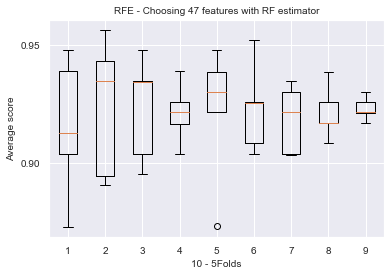

In [19]:

model = list()
X_t=df[np.unique(dd)].to_numpy()
for x in range(1,10):
    folds = 5
    skf = StratifiedKFold(n_splits=folds, random_state=randint(1, 1000), shuffle=True, )
    skf.get_n_splits(X_t, y)
    acc_score = []
    for train_index, test_index in skf.split(X_t, y):
        X_train, X_test = X_t[train_index], X_t[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)
        
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        clf=xgboost.XGBClassifier(min_child_weight= 1, max_depth= 5, learning_rate= 0.2, colsample_bytree = 0.7, n_estimators=800, verbosity = 0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        #print('Accuracy on test set: ')
        #print(accuracy_score(y_test2, y_pred))
        print(confusion_matrix(y_test,y_pred))
        #print(classification_report(y_test2,y_pred))
        
        acc_score.append(accuracy_score(y_test, y_pred))
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             

print("Model:", model)
plt.boxplot(model)
plt.title('RFE - Choosing 47 features with RF estimator',fontsize=10)
plt.xlabel('10 - 5Folds',fontsize=10)
plt.ylabel('Average score',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("RFE-47-RF.png",dpi=500)
plt.show()

In [20]:
import numpy as np
np.mean([[0.9475982532751092, 0.9039301310043668, 0.9126637554585153, 0.9388646288209607, 0.8728070175438597], [0.9432314410480349, 0.9344978165938864, 0.8908296943231441, 0.9563318777292577, 0.8947368421052632], [0.9475982532751092, 0.9039301310043668, 0.9344978165938864, 0.8951965065502183, 0.9342105263157895], [0.925764192139738, 0.9213973799126638, 0.9039301310043668, 0.9388646288209607, 0.9166666666666666], [0.9475982532751092, 0.9301310043668122, 0.8733624454148472, 0.9213973799126638, 0.9385964912280702], [0.9039301310043668, 0.9082969432314411, 0.9519650655021834, 0.925764192139738, 0.9254385964912281], [0.9344978165938864, 0.9301310043668122, 0.9039301310043668, 0.9213973799126638, 0.9035087719298246], [0.9170305676855895, 0.9170305676855895, 0.9082969432314411, 0.925764192139738, 0.9385964912280702], [0.9213973799126638, 0.925764192139738, 0.9170305676855895, 0.9301310043668122, 0.9210526315789473]])

0.9213241740936522

1144

In [13]:
morethan2

46